# Data Statistics : Done by : Abhishek Subedi & Anusha Bora

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import re
import numpy as np

In [3]:
from IPython.display import display, HTML
css = """.output {flex-direction: row;}"""
HTML('<style>{}</style>'.format(css))

__import all the files__

In [4]:
books_metadata = pd.read_json('books_metadata_comics.json')
books_interactions = pd.read_json('books_interactions_final.json')
books_reviews = pd.read_json('books_review_comics_final.json')

In [3]:
books_metadata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23937 entries, 2 to 89410
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   text_reviews_count  23937 non-null  int64  
 1   language_code       23937 non-null  object 
 2   popular_shelves     23937 non-null  object 
 3   is_ebook            23937 non-null  object 
 4   average_rating      23937 non-null  float64
 5   description         23937 non-null  object 
 6   authors             23937 non-null  object 
 7   publication_year    23937 non-null  int64  
 8   book_id             23937 non-null  int64  
 9   ratings_count       23937 non-null  int64  
 10  work_id             23937 non-null  int64  
 11  title               23937 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 2.4+ MB


In [4]:
books_metadata.head()

,text_reviews_count,language_code,popular_shelves,is_ebook,average_rating,description,authors,publication_year,book_id,ratings_count,work_id,title
2,5,eng,"[{'count': '493', 'name': 'to-read'}, {'count'...",false,4.28,The questions plaguing Captain America's dream...,"[{'author_id': '37450', 'role': ''}]",2012,13571772,51,102217,Captain America: Winter Soldier (The Ultimate ...
4,6,en-US,"[{'count': '20', 'name': 'to-read'}, {'count':...",false,4.06,These are the stories that catapulted Superman...,"[{'author_id': '81563', 'role': ''}, {'author_...",1997,707611,51,693886,"Superman Archives, Vol. 2"
6,9,eng,"[{'count': '47', 'name': 'to-read'}, {'count':...",false,4.15,PRODUCT DESCRIPTION: The first new volume of G...,"[{'author_id': '14965', 'role': ''}, {'author_...",2016,27036536,39,47077783,"War Stories, Volume 3"
11,26,eng,"[{'count': '104', 'name': 'to-read'}, {'count'...",false,3.16,Sir Arthur Conan Doyle's dauntless detective r...,"[{'author_id': '61231', 'role': ''}, {'author_...",2011,11827783,114,16782451,Sherlock Holmes: Year One
12,6,eng,"[{'count': '133', 'name': 'manga'}, {'count': ...",false,4.41,This is the story of a group of boys who try t...,"[{'author_id': '294649', 'role': ''}]",2012,12349665,149,3062163,"Naoki Urasawa's 20th Century Boys, Volume 20 (..."


In [5]:
books_metadata[books_metadata['title']=='Watchmen']

,text_reviews_count,language_code,popular_shelves,is_ebook,average_rating,description,authors,publication_year,book_id,ratings_count,work_id,title
2749,10057,en-US,"[{'count': '73194', 'name': 'to-read'}, {'coun...",false,4.35,This Hugo Award-winning graphic novel chronicl...,"[{'author_id': '3961', 'role': ''}, {'author_i...",2005,472331,406669,4358649,Watchmen
7303,53,eng,"[{'count': '73194', 'name': 'to-read'}, {'coun...",false,4.35,In an alternate world where the mere presence ...,"[{'author_id': '3961', 'role': ''}, {'author_i...",2014,18373361,512,4358649,Watchmen
29612,137,eng,"[{'count': '73194', 'name': 'to-read'}, {'coun...",false,4.35,This Hugo Award-winning graphic novel chronicl...,"[{'author_id': '3961', 'role': ''}, {'author_i...",1987,781206,1172,4358649,Watchmen
34977,140,en-US,"[{'count': '73194', 'name': 'to-read'}, {'coun...",false,4.35,SOON TO BE A FEATURE FILM!\nThis Hugo Award-wi...,"[{'author_id': '3961', 'role': ''}, {'author_i...",2008,4054590,1320,4358649,Watchmen
36926,65,eng,"[{'count': '73194', 'name': 'to-read'}, {'coun...",false,4.35,"Alan Moore, the master storyteller behind V fo...","[{'author_id': '3961', 'role': ''}, {'author_i...",1987,1259931,454,4358649,Watchmen
65230,2,eng,"[{'count': '73194', 'name': 'to-read'}, {'coun...",false,4.35,This Hugo Award-winning graphic novel chronicl...,"[{'author_id': '3961', 'role': ''}, {'author_i...",2007,6468238,19,4358649,Watchmen
77930,49,eng,"[{'count': '73281', 'name': 'to-read'}, {'coun...",false,4.35,In an alternate world where the mere presence ...,"[{'author_id': '3961', 'role': ''}, {'author_i...",2013,17137603,531,4358649,Watchmen


__column names__

In [6]:
bmc = pd.DataFrame(books_metadata.columns)
bmc

,0
0,text_reviews_count
1,language_code
2,popular_shelves
3,is_ebook
4,average_rating
5,description
6,authors
7,publication_year
8,book_id
9,ratings_count


__Average of average rating__

In [7]:
average = books_metadata['average_rating'].sum()
average_rating = average/24179
average_rating

3.8715368708383315

__Unique books number__

In [8]:
len(books_metadata['book_id'].unique())

23937

__Ebook vs hardcopy__

In [9]:
is_ebook = len(books_metadata[books_metadata['is_ebook']=='true'])
not_ebook = len(books_metadata[books_metadata['is_ebook']=='false'])
print('is_ebook :', is_ebook, "not_ebook :",not_ebook )

is_ebook : 1878 not_ebook : 22059


__Frequency distribution of average_rating__

<AxesSubplot:title={'center':'Comics & Graphics'}, xlabel='average_rating', ylabel='count'>

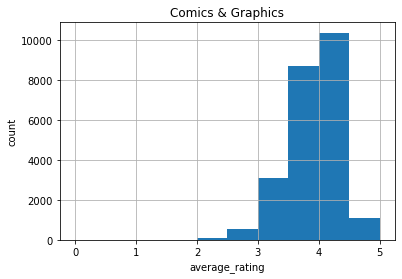

In [10]:
plt.figure()
plt.title("Comics & Graphics")
plt.ylabel('count')
plt.xlabel('average_rating')
books_metadata['average_rating'].hist()

__Frequency distribution of books over time__

In [11]:
books_metadata['publication_year'] = books_metadata['publication_year'].replace(to_replace = 13, value = 1981)
books_metadata['publication_year'] = books_metadata['publication_year'].replace(to_replace = 2105, value = 2007)
books_metadata['publication_year'] = books_metadata['publication_year'].replace(to_replace = 201, value = 2015)
books_metadata['publication_year'] = books_metadata['publication_year'].replace(to_replace = 207, value = 2016)
books_metadata['publication_year'] = books_metadata['publication_year'].replace(to_replace = 1016, value = 2016)

/Users/uni/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/uni/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


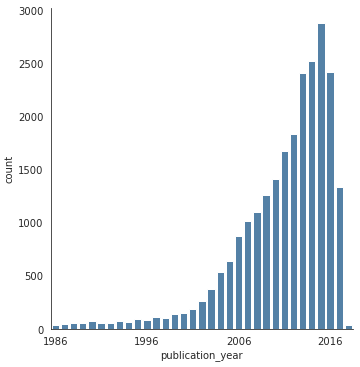

In [12]:
with sn.axes_style('white'):
    g = sn.factorplot("publication_year", data = books_metadata, aspect=1,
                     kind='count', color='steelblue')
    g.set_xticklabels(step=10)

__Oldest and latest publication year__

In [13]:
oldest = books_metadata['publication_year'].min()
latest = books_metadata['publication_year'].max()
print('oldest : ', oldest)
print('newest : ', latest)

oldest :  1986
newest :  2018


In [14]:
books_interactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4649631 entries, 0 to 4649630
Data columns (total 8 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   index         int64 
 1   user_id       object
 2   book_id       int64 
 3   review_id     object
 4   is_read       bool  
 5   rating        int64 
 6   date_added    object
 7   date_updated  object
dtypes: bool(1), int64(3), object(4)
memory usage: 288.2+ MB


In [15]:
books_interactions.head()

,index,user_id,book_id,review_id,is_read,rating,date_added,date_updated
0,1,8842281e1d1347389f2ab93d60773d4d,7648967,99b27059f711c37de8f90ee8e4dc0d1b,False,0,Fri Feb 24 08:59:44 -0800 2017,Fri Feb 24 08:59:44 -0800 2017
1,2,8842281e1d1347389f2ab93d60773d4d,15704307,cb944d94854df5afd22210bb0aa0c903,False,0,Wed May 20 21:28:56 -0700 2015,Wed May 20 21:28:57 -0700 2015
2,3,8842281e1d1347389f2ab93d60773d4d,6902644,2711bac2a8cc600dae1590a6ca0edb34,False,0,Sun Jun 01 17:25:23 -0700 2014,Sun Jun 01 17:25:23 -0700 2014
3,5,8842281e1d1347389f2ab93d60773d4d,13163846,84ae8909f3fee71ba40be06e3a6aa32e,False,0,Tue Jul 24 14:36:13 -0700 2012,Tue Jul 24 14:36:13 -0700 2012
4,8,8842281e1d1347389f2ab93d60773d4d,472331,dc86ebd8df595749ebe277dd67b0a865,False,0,Thu Aug 14 10:56:30 -0700 2008,Fri Jun 05 12:28:47 -0700 2009


__interactions columns__

In [16]:
bic = pd.DataFrame(books_interactions.columns)
bic

,0
0,index
1,user_id
2,book_id
3,review_id
4,is_read
5,rating
6,date_added
7,date_updated


In [17]:
books_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 330052 entries, 0 to 330051
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   index         330052 non-null  int64 
 1   user_id       330052 non-null  object
 2   book_id       330052 non-null  int64 
 3   review_id     330052 non-null  object
 4   rating        330052 non-null  int64 
 5   review_text   330052 non-null  object
 6   date_added    330052 non-null  object
 7   date_updated  330052 non-null  object
 8   read_at       330052 non-null  object
 9   n_votes       330052 non-null  int64 
 10  n_comments    330052 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 30.2+ MB


In [18]:
books_reviews.head()

,index,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,n_votes,n_comments
0,0,dc3763cdb9b2cae805882878eebb6a32,18471619,66b2ba840f9bd36d6d27f46136fe4772,3,Sherlock Holmes and the Vampires of London \n ...,Thu Dec 05 10:44:25 -0800 2013,Thu Dec 05 10:45:15 -0800 2013,Tue Nov 05 00:00:00 -0800 2013,0,0
1,1,bafc2d50014200cda7cb2b6acd60cd73,6315584,72f1229aba5a88f9e72f0dcdc007dd22,4,"I've never really liked Spider-Man. I am, howe...",Wed Aug 10 06:06:48 -0700 2016,Fri Aug 12 08:49:54 -0700 2016,Fri Aug 12 08:49:54 -0700 2016,0,0
2,3,bafc2d50014200cda7cb2b6acd60cd73,18454118,c3cc5a3e1d6b6c9cf1c044f306c8e752,5,I've been waiting so long for this. I first st...,Mon Mar 03 17:45:56 -0800 2014,Mon Mar 03 17:54:11 -0800 2014,Sat Mar 01 00:00:00 -0800 2014,1,0
3,4,bafc2d50014200cda7cb2b6acd60cd73,2239435,cc444be37ab0a42bfb4dd818cb5edd10,4,The only thing more entertaining than this boo...,Wed Apr 03 12:37:48 -0700 2013,Wed Apr 03 13:03:36 -0700 2013,Wed Apr 03 13:03:36 -0700 2013,0,0
4,6,bafc2d50014200cda7cb2b6acd60cd73,13526176,68267ebf90e2da0d96a3d6aefb5b8ac7,3,This wasn't my favourite Black Butler book. I ...,Thu Nov 15 13:28:38 -0800 2012,Thu Nov 15 13:32:17 -0800 2012,Thu Nov 15 13:32:17 -0800 2012,0,0


__reviews columns__

In [19]:
brc = pd.DataFrame(books_reviews.columns)
brc

,0
0,index
1,user_id
2,book_id
3,review_id
4,rating
5,review_text
6,date_added
7,date_updated
8,read_at
9,n_votes


In [20]:
len(books_reviews['book_id'].unique())

24166

__data cleaning__

In [21]:
books_reviews['review_text'] = books_reviews['review_text'].str.lower()

In [27]:
#remove punctuations
#remove all non alphabetic characters
regex_1 = re.compile(r'[^a-zA-Z]')
books_reviews['review_text'] = pd.Series(books_reviews['review_text']).str.replace(regex_1, ' ')

In [28]:
#reduce multi-space to single space
regex_2 = re.compile(r' +')
books_reviews['review_text'] = pd.Series(books_reviews['review_text']).str.replace(regex_2,' ')

In [29]:
books_reviews['review_text']

0         sherlock holmes and the vampires of london rel...
1         i ve never really liked spider man i am howeve...
2         i ve been waiting so long for this i first stu...
3         the only thing more entertaining than this boo...
4         this wasn t my favourite black butler book i w...
                                ...                        
330047    fantastic art with a creative twist on the ori...
330048    enjoyable quite cute and funny follows a young...
330049    this is just great narrative and great art the...
330050    stunning follow up once again it s not the art...
330051    i grew up with the terran trade authority book...
Name: review_text, Length: 330052, dtype: object

In [30]:
books_reviews['word_count'] = books_reviews['review_text'].apply(lambda x: len(x.strip().split()))

In [31]:
books_reviews.head()

,index,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,n_votes,n_comments,word_count
0,0,dc3763cdb9b2cae805882878eebb6a32,18471619,66b2ba840f9bd36d6d27f46136fe4772,3,sherlock holmes and the vampires of london rel...,Thu Dec 05 10:44:25 -0800 2013,Thu Dec 05 10:45:15 -0800 2013,Tue Nov 05 00:00:00 -0800 2013,0,0,671
1,1,bafc2d50014200cda7cb2b6acd60cd73,6315584,72f1229aba5a88f9e72f0dcdc007dd22,4,i ve never really liked spider man i am howeve...,Wed Aug 10 06:06:48 -0700 2016,Fri Aug 12 08:49:54 -0700 2016,Fri Aug 12 08:49:54 -0700 2016,0,0,38
2,3,bafc2d50014200cda7cb2b6acd60cd73,18454118,c3cc5a3e1d6b6c9cf1c044f306c8e752,5,i ve been waiting so long for this i first stu...,Mon Mar 03 17:45:56 -0800 2014,Mon Mar 03 17:54:11 -0800 2014,Sat Mar 01 00:00:00 -0800 2014,1,0,228
3,4,bafc2d50014200cda7cb2b6acd60cd73,2239435,cc444be37ab0a42bfb4dd818cb5edd10,4,the only thing more entertaining than this boo...,Wed Apr 03 12:37:48 -0700 2013,Wed Apr 03 13:03:36 -0700 2013,Wed Apr 03 13:03:36 -0700 2013,0,0,629
4,6,bafc2d50014200cda7cb2b6acd60cd73,13526176,68267ebf90e2da0d96a3d6aefb5b8ac7,3,this wasn t my favourite black butler book i w...,Thu Nov 15 13:28:38 -0800 2012,Thu Nov 15 13:32:17 -0800 2012,Thu Nov 15 13:32:17 -0800 2012,0,0,127


In [32]:
books_reviews['word_count'].describe()

count    330052.000000
mean         93.399958
std         141.198153
min           0.000000
25%          18.000000
50%          46.000000
75%         110.000000
max        3820.000000
Name: word_count, dtype: float64

__plot reivew length with respect to review count__

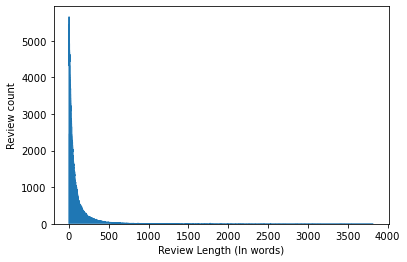

In [33]:
plt.xlabel('Review Length (In words)')
plt.ylabel('Review count')
plt.hist(books_reviews['word_count'], bins=np.arange(max(books_reviews['word_count'])), histtype='step', linewidth=1, fill=True);